In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
# from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160614)
tf.set_random_seed(20160614)

%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
def generate_datablock(n, mu, var, t):
    data = np.random.multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns = ['x1', 'x2'])
    df['t'] = t
    return df
df0 = generate_datablock(30, [-7,-7], 18, 1)
df1 = generate_datablock(30, [-7, 7], 18, 0)
df2 = generate_datablock(30, [ 7,-7], 18, 0)
df3 = generate_datablock(30, [ 7, 7], 18, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [4]:
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [5]:
num_units1 = 2
num_units2 = 2

x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units1]))
b1 = tf.Variable(tf.zeros([num_units1]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2,1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden2, w0) + b0)

In [6]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t * tf.log(p) + (1-t) * tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.07).minimize(loss)
correct_prediction = tf.equal(tf.sign(p - 0.5), tf.sign(t - 0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [8]:
i=0
for _ in range(2000):
    i += 1
#     batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:train_x, t:train_t})
        print ('Step:%d, Loss:%f, Accuracy:%f' % (i, loss_val, acc_val) )

Step:100, Loss:54.419449, Accuracy:0.816667
Step:200, Loss:54.364140, Accuracy:0.816667
Step:300, Loss:54.348743, Accuracy:0.816667
Step:400, Loss:44.171532, Accuracy:0.841667
Step:500, Loss:43.968437, Accuracy:0.841667
Step:600, Loss:43.966812, Accuracy:0.841667
Step:700, Loss:43.969692, Accuracy:0.841667
Step:800, Loss:16.647890, Accuracy:0.966667
Step:900, Loss:16.564632, Accuracy:0.966667
Step:1000, Loss:16.763838, Accuracy:0.966667
Step:1100, Loss:16.294830, Accuracy:0.966667
Step:1200, Loss:16.535582, Accuracy:0.966667
Step:1300, Loss:16.297779, Accuracy:0.966667
Step:1400, Loss:16.287823, Accuracy:0.966667
Step:1500, Loss:16.404818, Accuracy:0.966667
Step:1600, Loss:16.343367, Accuracy:0.966667
Step:1700, Loss:16.296162, Accuracy:0.966667
Step:1800, Loss:16.281353, Accuracy:0.966667
Step:1900, Loss:16.309582, Accuracy:0.966667
Step:2000, Loss:16.436703, Accuracy:0.966667


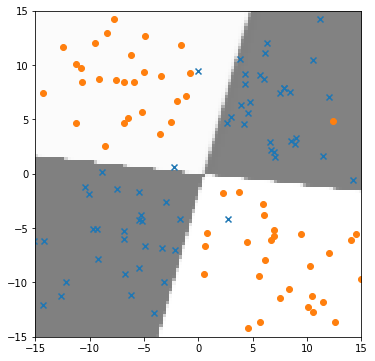

In [9]:
train_set1 = train_set[train_set['t'] == 1]
train_set2 = train_set[train_set['t'] == 0]

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])

subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x')
subplot.scatter(train_set2.x1, train_set2.x2, marker = 'o')

locations = []
for x2 in np.linspace(-15, 15, 100):
    for x1 in np.linspace(-15, 15, 100):
        locations.append((x1, x2))

p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent = (-15, 15, -15, 15), cmap = plt.cm.gray_r, alpha = 0.5)                        